In [1]:
#IMPORTACION DE LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [2]:
#CARGAMOS EL DATASET
df = pd.read_csv("telecom_churn.csv")

#VISTA GENERAL DEL DATASET
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#DIMENSIONES DEL DATASET
df.shape

(7043, 21)

In [4]:
#TIPOS DE DATOS
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [5]:
#ESTADISTICAS BASICAS
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
#VALORES NULOS POR COLUMNA
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#CONTEO DE CLASES
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

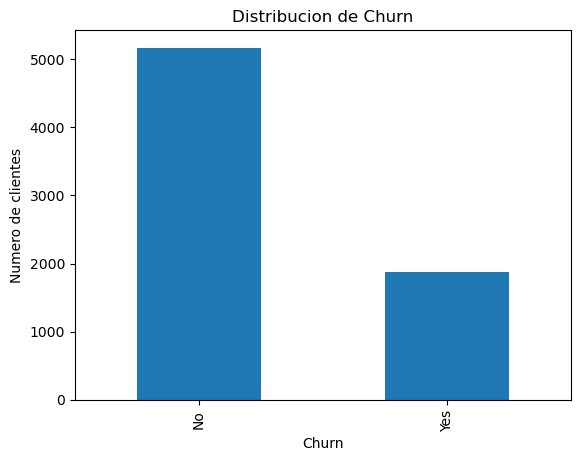

In [8]:
#VISUALIZACION
df["Churn"].value_counts().plot(kind="bar")
plt.title("Distribucion de Churn")
plt.xlabel("Churn")
plt.ylabel("Numero de clientes")
plt.show()

In [9]:
#CONVERTIR CHURN A BINARIA
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


In [10]:
#LIMPIEZA DE DATOS

#ELIMINAR COLUMNA ID
df.drop(columns=['customerID'], inplace=True, errors='ignore')


In [11]:
#CONVERTIR TOTALCHARGES A NUMERICO
if "TotalCharges" in df.columns:
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


In [12]:
#SEPARAR TIPOS DE COLUMNAS
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

#IMPUTACION
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

    

C:\Users\salva\AppData\Local\Temp\ipykernel_5028\4142479861.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\salva\AppData\Local\Temp\ipykernel_5028\4142479861.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [13]:
#ONE-HOT ENCODING
df_encoded = pd.get_dummies(df, drop_first=True)

In [14]:
#SEPARACION DE VARIABLES CATEGORICAS
X = df_encoded.drop("Churn", axis=1)

y = df_encoded["Churn"]

In [15]:
#DIVIDIR EN CONJUNTO DE ENTRENAMIENTO Y PRUEBA
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [16]:
#ESCALADO DE VARIABLES
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


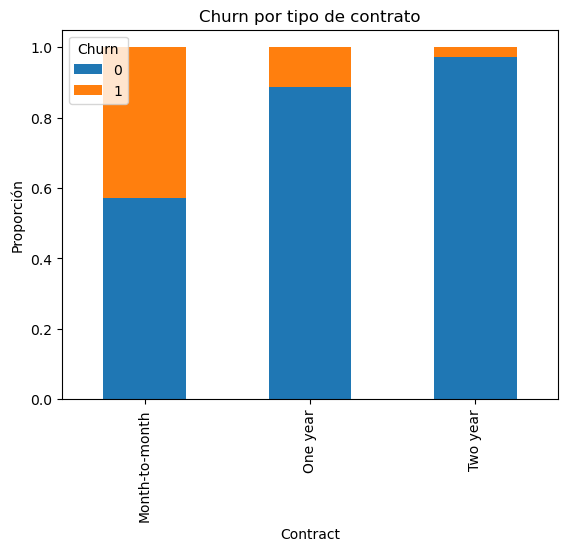

In [17]:
#PROPORCION DE CHURN
y.value_counts(normalize=True)


#CHURN VS TIPO DE CONTRATO
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index')
contract_churn.plot(kind='bar', stacked=True)
plt.title('Churn por tipo de contrato')
plt.ylabel('Proporción')
plt.show()


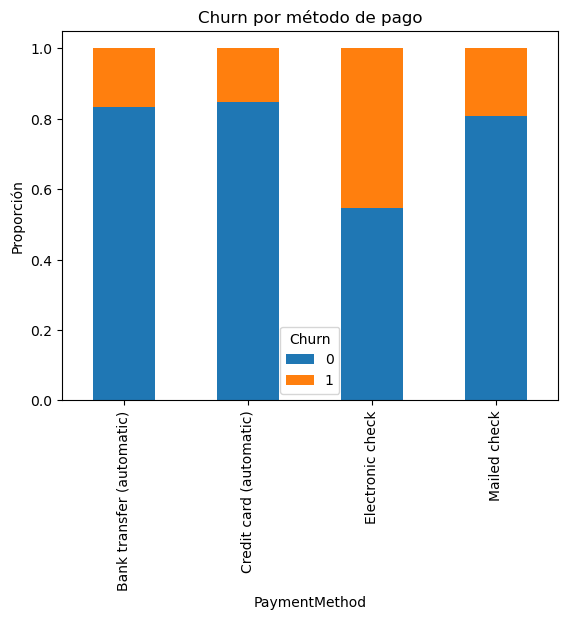

In [18]:
#CHURCH VS METODO DE PAGO
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index')
payment_churn.plot(kind='bar', stacked=True)
plt.title('Churn por método de pago')
plt.ylabel('Proporción')
plt.show()

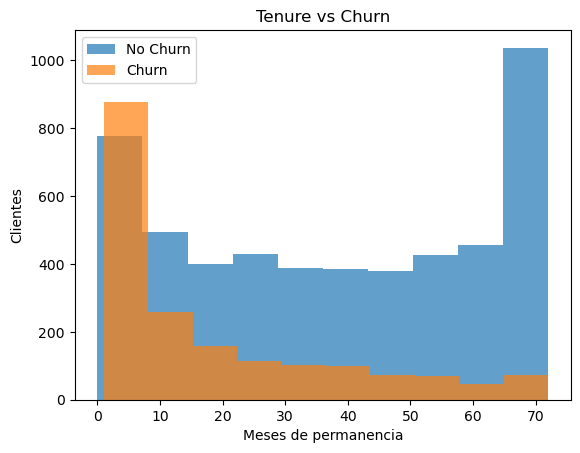

In [19]:
#TENURE
plt.hist(df[df['Churn'] == 0]['tenure'], alpha=0.7, label='No Churn')
plt.hist(df[df['Churn'] == 1]['tenure'], alpha=0.7, label='Churn')
plt.xlabel('Meses de permanencia')
plt.ylabel('Clientes')
plt.legend()
plt.title('Tenure vs Churn')
plt.show()

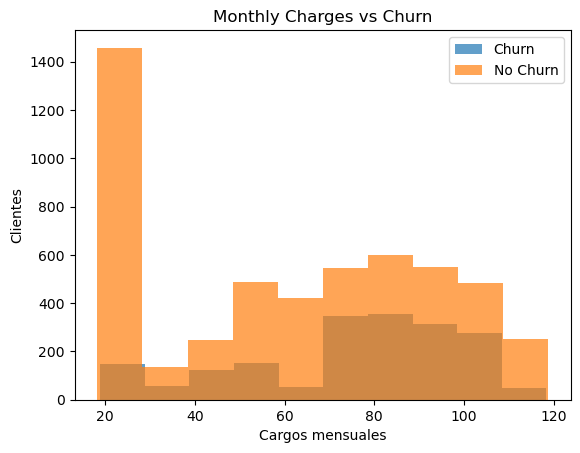

In [20]:
#CARGOS MENSUALES
plt.hist(df[df['Churn'] == 1]['MonthlyCharges'], alpha=0.7, label='Churn')
plt.hist(df[df['Churn'] == 0]['MonthlyCharges'], alpha=0.7, label='No Churn')
plt.xlabel('Cargos mensuales')
plt.ylabel('Clientes')
plt.legend()
plt.title('Monthly Charges vs Churn')
plt.show()

In [21]:
#MODELO 1 LOGISTIC REGRESSION
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [22]:
#PREDICCIONES 
y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

In [23]:
#MODELO 2 RANDOM FOREST
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

#PREDICCION 
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

In [24]:
#EVALUACION DE MODELOS
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

In [25]:
#EVALUACION DE LOGISTIC REGRESSION
print("LOGISTIC REGRESSION")

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_lr))


LOGISTIC REGRESSION
Accuracy: 0.8069552874378992
Precision: 0.6583850931677019
Recall: 0.5668449197860963
F1-score: 0.6091954022988506

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [26]:
#EVALUACION DE RANDOM FOREST
print("RANDOM FOREST")

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_rf))


RANDOM FOREST
Accuracy: 0.7892122072391767
Precision: 0.6305084745762712
Recall: 0.49732620320855614
F1-score: 0.5560538116591929

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



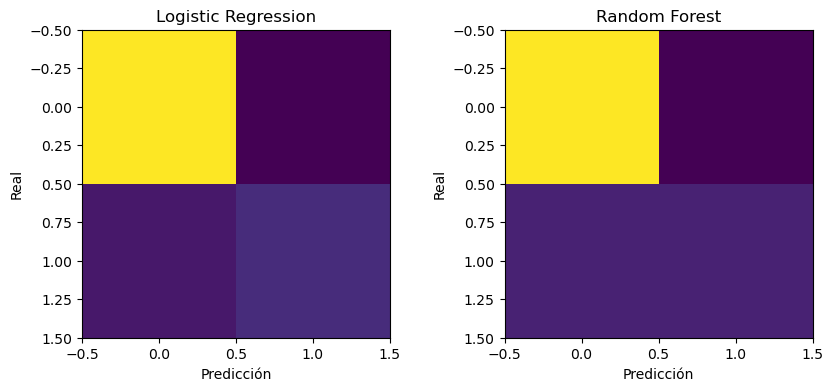

In [27]:
#MATRIZ DE CONFUSION
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(cm_lr)
plt.title("Logistic Regression")
plt.xlabel("Predicción")
plt.ylabel("Real")

plt.subplot(1,2,2)
plt.imshow(cm_rf)
plt.title("Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")

plt.show()


In [28]:
#INTERPRETACION DE RESULTADOS
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": log_reg.coef_[0]
})

coef_df = coef_df.sort_values(by="Coefficient", ascending=False)
coef_df.head(10)


,Feature,Coefficient
10,InternetService_Fiber optic,0.778760
3,TotalCharges,0.497246
23,StreamingMovies_Yes,0.258653
21,StreamingTV_Yes,0.258042
9,MultipleLines_Yes,0.216356
26,PaperlessBilling_Yes,0.181833
28,PaymentMethod_Electronic check,0.181456
17,DeviceProtection_Yes,0.053625
0,SeniorCitizen,0.052901
29,PaymentMethod_Mailed check,0.033133


In [29]:
#INTERPRETACION RANDOM FOREST
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance.head(10)


,Feature,Importance
3,TotalCharges,0.177273
1,tenure,0.164566
2,MonthlyCharges,0.151406
25,Contract_Two year,0.059623
10,InternetService_Fiber optic,0.040754
28,PaymentMethod_Electronic check,0.035761
24,Contract_One year,0.029983
13,OnlineSecurity_Yes,0.028859
4,gender_Male,0.025542
26,PaperlessBilling_Yes,0.023940


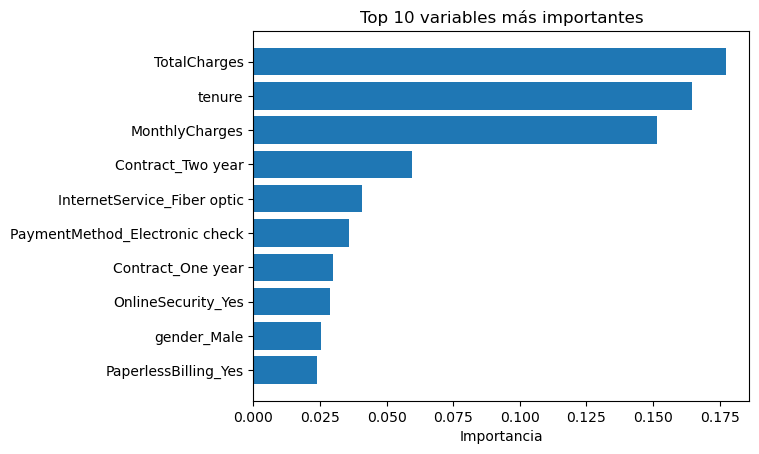

In [30]:


top_features = feature_importance.head(10)

plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel("Importancia")
plt.title("Top 10 variables más importantes")
plt.gca().invert_yaxis()
plt.show()


In [31]:
df_risk = X_test.copy()
df_risk['Churn_Prob'] = y_prob_rf

df_risk['Risk_Level'] = pd.cut(
    df_risk['Churn_Prob'],
    bins=[0, 0.4, 0.7, 1],
    labels=['Bajo', 'Medio', 'Alto']
)

df_risk['Risk_Level'].value_counts()


Risk_Level
Bajo     911
Medio    257
Alto     136
Name: count, dtype: int64